Function for Applying Mask:
apply_mask: A function that takes an RGB image (image_rgb) and a mask (mask). It applies the filter defined by the mask using cv2.filter2D and returns the enhanced image.

Sharpening Mask:
sharpen_mask: A function that returns a 3x3 sharpening mask.

emboss_mask: A function that returns a 3x3 embossing mask.

Edge Detection Mask:
edge_detection_mask: A function that returns a 3x3 edge detection mask.
python

Image Enhancement and Display Function:
enhance_image_with_masks: A function that takes an image path, reads the image, converts it to RGB, defines different masks, applies the masks for image enhancement, and displays the original and enhanced images using matplotlib.


File Upload and Function Invocation:
Uploading an image using files.upload().
Extracting the path of the uploaded image.
Calling the enhance_image_with_masks function with the uploaded image path to perform image enhancement and display the results.

Saving 1442313353nasa-small.jpg to 1442313353nasa-small.jpg


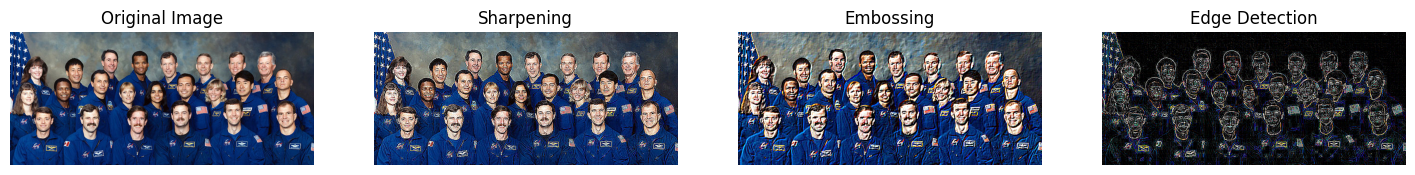

In [ ]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

def apply_mask(image_rgb, mask):
    # Apply the mask to the image
    enhanced_image = cv2.filter2D(image_rgb,-1, mask)
    return enhanced_image

def sharpen_mask(image_shape):
    return np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])

def emboss_mask(image_shape):
    return np.array([[-2, -1, 0],
                     [-1, 1, 1],
                     [0, 1, 2]])

def edge_detection_mask(image_shape):
    return np.array([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]])

def enhance_image_with_masks(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to RGB (OpenCV uses BGR by default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define different masks for image enhancement
    sharpen_mask_matrix = sharpen_mask(image_rgb.shape)
    emboss_mask_matrix = emboss_mask(image_rgb.shape)
    edge_detection_mask_matrix = edge_detection_mask(image_rgb.shape)

    # Apply the selected masks for image enhancement
    enhanced_sharpen = apply_mask(image_rgb, sharpen_mask_matrix)
    enhanced_emboss = apply_mask(image_rgb, emboss_mask_matrix)
    enhanced_edge_detection = apply_mask(image_rgb, edge_detection_mask_matrix)

    # Display the original and enhanced images using matplotlib
    plt.figure(figsize=(18, 8))

    plt.subplot(1, 4, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(enhanced_sharpen)
    plt.title('Sharpening')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(enhanced_emboss)
    plt.title('Embossing')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(enhanced_edge_detection, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')

    plt.show()

# Upload an image to Google Colab
uploaded = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded.keys())[0]

# Call the image enhancement function
enhance_image_with_masks(image_path)
